## Bag of words

In [1]:
from nltk.tokenize import TreebankWordTokenizer

sentence = """남수가 NLP를 더 빨리 학습할 수록, 남수가 더 빨리 챗봇을 만들 것이다.
남수가 챗봇과 관련된 더 많은 내용이 알고 싶다고 한다."""
tokenizer = TreebankWordTokenizer()
tokens = tokenizer.tokenize(sentence)
tokens

['남수가',
 'NLP를',
 '더',
 '빨리',
 '학습할',
 '수록',
 ',',
 '남수가',
 '더',
 '빨리',
 '챗봇을',
 '만들',
 '것이다.',
 '남수가',
 '챗봇과',
 '관련된',
 '더',
 '많은',
 '내용이',
 '알고',
 '싶다고',
 '한다',
 '.']

In [2]:
import pos_tag

for sent in sentence.splitlines():
    print(pos_tag.twitter_pos(sent))

[ 남수가 NLP를 더 빨리 학습할 수록, 남수가 더 빨리 챗봇을 만들 것이다. ] 

형태소 분석중... : OK

[('남수가', 'Verb(남다)'), ('NLP', 'Alpha'), ('를', 'Noun'), ('더', 'Noun'), ('빨리', 'Adverb'), ('학습', 'Noun'), ('할', 'Verb(하다)'), ('수록', 'Noun'), (',', 'Punctuation'), ('남수가', 'Verb(남다)'), ('더', 'Noun'), ('빨리', 'Adverb'), ('챗봇*', 'Noun'), ('을', 'Josa'), ('만들', 'Verb(만들다)'), ('것', 'Noun'), ('이다', 'Josa'), ('.', 'Punctuation')]
[ 남수가 챗봇과 관련된 더 많은 내용이 알고 싶다고 한다. ] 

형태소 분석중... : OK

[('남수가', 'Verb(남다)'), ('챗봇*', 'Noun'), ('과', 'Josa'), ('관련', 'Noun'), ('된', 'Verb(되다)'), ('더', 'Noun'), ('많은', 'Adjective(많다)'), ('내용', 'Noun'), ('이', 'Josa'), ('알', 'Noun'), ('고', 'Josa'), ('싶다고', 'Verb(싶다)'), ('한다', 'Verb(하다)'), ('.', 'Punctuation')]


#### Counter

In [3]:
from collections import Counter
bag_of_words = Counter(tokens)
bag_of_words

Counter({'남수가': 3,
         'NLP를': 1,
         '더': 3,
         '빨리': 2,
         '학습할': 1,
         '수록': 1,
         ',': 1,
         '챗봇을': 1,
         '만들': 1,
         '것이다.': 1,
         '챗봇과': 1,
         '관련된': 1,
         '많은': 1,
         '내용이': 1,
         '알고': 1,
         '싶다고': 1,
         '한다': 1,
         '.': 1})

In [4]:
bag_of_words.most_common(3)

[('남수가', 3), ('더', 3), ('빨리', 2)]

## TF (Term Frequency)확인

In [5]:
times_hurry_appears = bag_of_words['더']
print('times_hurry_appears =', times_hurry_appears)
num_uniqe_words = len(bag_of_words)
print('num_uniqe_words =', num_uniqe_words)
tf = times_hurry_appears / num_uniqe_words
print('times_hurry_appears / num_uniqe_words =', round(tf, 4))

times_hurry_appears = 3
num_uniqe_words = 18
times_hurry_appears / num_uniqe_words = 0.1667


#### 단순히 단어의 개수 만으로는 문서의 중요 단어라 할 수 없음
- dog가 3번 나온 A 문서 vs dog가 100번 나온 B 문서
- B 문서에서 dog가 더 중요한가?

#### 과연 그럴까?
###### A 문서는 총 30단어 였음
- TF("dog", documentA) = 3/30 = .1

###### B 문서는 총 580000단어 였음
- TF("dog", documentB) = 100/580000 = .00017


#### `단순 단어의 개수가 아닌 전체 문서중 나타나는 해당 단어의 빈도 수에 집중할 필요가 있음`

## 큰 텍스트 다뤄보기

In [6]:
import os
os.listdir(os.getcwd())  # 현재 위치의 파일 목록 확인

['.ipynb_checkpoints',
 'chap3.ipynb',
 'img',
 'korea.txt',
 'korea2.txt',
 'pos_tag.py',
 '__pycache__']

In [7]:
from collections import Counter
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

with open('korea.txt', 'r', encoding='utf-8') as f:
    sentences = f.read()
    
sentences

"대한민국(大韓民國, 영어: Republic of Korea; ROK)은 동아시아의 한반도 남부에 있는 공화국이다. 서쪽으로는 서해를 사이에 두고 중화인민공화국이, 동쪽으로는 동해를 사이에 두고 일본이 있으며 북쪽으로는 조선민주주의인민공화국과 맞닿아 있다. 수도는 서울특별시이며, 국기는 태극기, 국가는 애국가(비공식), 공용어는 한국어와 한국 수어이다.\n대한민국이라는 명칭은 3.1 운동을 통해 독립을 선언하고, 1919년 4월 11일 대한민국 임시정부가 수립하며 시작되었다. 1945년 광복 이후, 한반도의 북위 38도선 이남 지역 거주자들의 자유로운 선거(5.10 총선거)를 통하여 1948년 8월 15일에 공식적인 민주주의 국가로 출범하였다. 대한민국 헌법 전문에 따르면 대한국민은 3.1운동으로 건립된 대한민국 임시 정부의 법통을 계승한다. 대한민국은 1948년 12월 유엔 총회 결의 제195호를 통해 유엔으로부터 한반도 대다수 주민의 자유로운 의사에 따라 탄생한 한반도 유일한 정부로서 합법 정부로 승인 받았다. 이와 관련하여 대한민국 정부가 1948년에 유엔 감시 하에 선거를 실시한 한반도 이남에서만 유일한 합법 정부라는 주장도 있다. 1991년 대한민국과 조선민주주의인민공화국은 동시에 UN에 가입하였다. 한편 국제법 상의 관례와 통설, 대한민국의 헌법재판소의 판례에 따르면 조선민주주의인민공화국이 UN에 가입하였다 하여 가맹국들 상호 간에도 당연히 그 국가성이 승인되는 것은 아니고 또 그러한 의무가 있는 것이 아니다. 대한민국은 조선민주주의인민공화국의 국가성을 원칙적으로 부정한다.\n대한민국은 한국 전쟁 이래 일명 '한강의 기적'이라고 불리는 높은 경제 발전을 이룩하며, 1990년대에 이르러 세계적인 경제 강국으로 발전하였다. 2015년 구매력 기준 1인당 국민 총소득(GDP)은 36,601달러로 세계은행에서 고소득 국가로 분류되었고, 2016년 유엔의 인간 개발 지수(HDI) 조사에서 세계 18위로 '매우 높음'으로 분류되었다. 또한, 국제 통화 기금(I

In [8]:
tokens = tokenizer.tokenize(sentences)
tokens

['대한민국',
 '(',
 '大韓民國',
 ',',
 '영어',
 ':',
 'Republic',
 'of',
 'Korea',
 ';',
 'ROK',
 ')',
 '은',
 '동아시아의',
 '한반도',
 '남부에',
 '있는',
 '공화국이다.',
 '서쪽으로는',
 '서해를',
 '사이에',
 '두고',
 '중화인민공화국이',
 ',',
 '동쪽으로는',
 '동해를',
 '사이에',
 '두고',
 '일본이',
 '있으며',
 '북쪽으로는',
 '조선민주주의인민공화국과',
 '맞닿아',
 '있다.',
 '수도는',
 '서울특별시이며',
 ',',
 '국기는',
 '태극기',
 ',',
 '국가는',
 '애국가',
 '(',
 '비공식',
 ')',
 ',',
 '공용어는',
 '한국어와',
 '한국',
 '수어이다.',
 '대한민국이라는',
 '명칭은',
 '3.1',
 '운동을',
 '통해',
 '독립을',
 '선언하고',
 ',',
 '1919년',
 '4월',
 '11일',
 '대한민국',
 '임시정부가',
 '수립하며',
 '시작되었다.',
 '1945년',
 '광복',
 '이후',
 ',',
 '한반도의',
 '북위',
 '38도선',
 '이남',
 '지역',
 '거주자들의',
 '자유로운',
 '선거',
 '(',
 '5.10',
 '총선거',
 ')',
 '를',
 '통하여',
 '1948년',
 '8월',
 '15일에',
 '공식적인',
 '민주주의',
 '국가로',
 '출범하였다.',
 '대한민국',
 '헌법',
 '전문에',
 '따르면',
 '대한국민은',
 '3.1운동으로',
 '건립된',
 '대한민국',
 '임시',
 '정부의',
 '법통을',
 '계승한다.',
 '대한민국은',
 '1948년',
 '12월',
 '유엔',
 '총회',
 '결의',
 '제195호를',
 '통해',
 '유엔으로부터',
 '한반도',
 '대다수',
 '주민의',
 '자유로운',
 '의사에',
 '따라',
 '탄생한',
 '한반도',
 '유일한',
 '정

In [9]:
tokens = []

for sent in sentences.splitlines():
    tokens.extend(pos_tag.twitter_pos(sent, concat=True))
    
    
tokens

[ 대한민국(大韓民國, 영어: Republic of Korea; ROK)은 동아시아의 한반도 남부에 있는 공화국이다. 서쪽으로는 서해를 사이에 두고 중화인민공화국이, 동쪽으로는 동해를 사이에 두고 일본이 있으며 북쪽으로는 조선민주주의인민공화국과 맞닿아 있다. 수도는 서울특별시이며, 국기는 태극기, 국가는 애국가(비공식), 공용어는 한국어와 한국 수어이다. ] 

형태소 분석중... : OK

[ 대한민국이라는 명칭은 3.1 운동을 통해 독립을 선언하고, 1919년 4월 11일 대한민국 임시정부가 수립하며 시작되었다. 1945년 광복 이후, 한반도의 북위 38도선 이남 지역 거주자들의 자유로운 선거(5.10 총선거)를 통하여 1948년 8월 15일에 공식적인 민주주의 국가로 출범하였다. 대한민국 헌법 전문에 따르면 대한국민은 3.1운동으로 건립된 대한민국 임시 정부의 법통을 계승한다. 대한민국은 1948년 12월 유엔 총회 결의 제195호를 통해 유엔으로부터 한반도 대다수 주민의 자유로운 의사에 따라 탄생한 한반도 유일한 정부로서 합법 정부로 승인 받았다. 이와 관련하여 대한민국 정부가 1948년에 유엔 감시 하에 선거를 실시한 한반도 이남에서만 유일한 합법 정부라는 주장도 있다. 1991년 대한민국과 조선민주주의인민공화국은 동시에 UN에 가입하였다. 한편 국제법 상의 관례와 통설, 대한민국의 헌법재판소의 판례에 따르면 조선민주주의인민공화국이 UN에 가입하였다 하여 가맹국들 상호 간에도 당연히 그 국가성이 승인되는 것은 아니고 또 그러한 의무가 있는 것이 아니다. 대한민국은 조선민주주의인민공화국의 국가성을 원칙적으로 부정한다. ] 

형태소 분석중... : OK

[ 대한민국은 한국 전쟁 이래 일명 '한강의 기적'이라고 불리는 높은 경제 발전을 이룩하며, 1990년대에 이르러 세계적인 경제 강국으로 발전하였다. 2015년 구매력 기준 1인당 국민 총소득(GDP)은 36,601달러로 세계은행에서 고소득 국가로 분류되었고, 2016년 유엔의 인간 개발 지수(HDI)

['대한민국/Noun',
 '(/Punctuation',
 '大韓民國/Foreign',
 ',/Punctuation',
 '영어/Noun',
 ':/Punctuation',
 'Republic/Alpha',
 'of/Alpha',
 'Korea/Alpha',
 ';/Punctuation',
 'ROK/Alpha',
 ')/Punctuation',
 '은/Noun',
 '동아시아/Noun',
 '의/Josa',
 '한반도/Noun',
 '남부/Noun',
 '에/Josa',
 '있는/Adjective(있다)',
 '공화국/Noun',
 '이다/Josa',
 './Punctuation',
 '서쪽/Noun',
 '으로는/Josa',
 '서해/Noun',
 '를/Josa',
 '사이/Noun',
 '에/Josa',
 '두고/Verb(두다)',
 '중화인민공화국/Noun',
 '이/Josa',
 ',/Punctuation',
 '동쪽/Noun',
 '으로는/Josa',
 '동해/Noun',
 '를/Josa',
 '사이/Noun',
 '에/Josa',
 '두고/Verb(두다)',
 '일본/Noun',
 '이/Josa',
 '있으며/Adjective(있다)',
 '북쪽/Noun',
 '으로는/Josa',
 '조선/Noun',
 '민주주의/Noun',
 '인민공화국/Noun',
 '과/Josa',
 '맞닿아/Verb(맞닿다)',
 '있다/Adjective(있다)',
 './Punctuation',
 '수도/Noun',
 '는/Josa',
 '서울특별시/Noun',
 '이며/Josa',
 ',/Punctuation',
 '국기/Noun',
 '는/Josa',
 '태극기/Noun',
 ',/Punctuation',
 '국가/Noun',
 '는/Josa',
 '애국가/Noun',
 '(/Punctuation',
 '비공식/Noun',
 '),/Punctuation',
 '공/Modifier',
 '용어/Noun',
 '는/Josa',
 '한국어/Noun',
 '와/Josa',


In [10]:
token_counts = Counter(tokens)
token_counts

Counter({'대한민국/Noun': 14,
         '(/Punctuation': 10,
         '大韓民國/Foreign': 1,
         ',/Punctuation': 11,
         '영어/Noun': 1,
         ':/Punctuation': 1,
         'Republic/Alpha': 1,
         'of/Alpha': 1,
         'Korea/Alpha': 1,
         ';/Punctuation': 1,
         'ROK/Alpha': 1,
         ')/Punctuation': 6,
         '은/Noun': 3,
         '동아시아/Noun': 1,
         '의/Josa': 11,
         '한반도/Noun': 5,
         '남부/Noun': 1,
         '에/Josa': 10,
         '있는/Adjective(있다)': 2,
         '공화국/Noun': 1,
         '이다/Josa': 3,
         './Punctuation': 16,
         '서쪽/Noun': 1,
         '으로는/Josa': 3,
         '서해/Noun': 1,
         '를/Josa': 4,
         '사이/Noun': 2,
         '두고/Verb(두다)': 2,
         '중화인민공화국/Noun': 1,
         '이/Josa': 5,
         '동쪽/Noun': 1,
         '동해/Noun': 1,
         '일본/Noun': 1,
         '있으며/Adjective(있다)': 1,
         '북쪽/Noun': 1,
         '조선/Noun': 4,
         '민주주의/Noun': 5,
         '인민공화국/Noun': 4,
         '과/Josa': 3,
        

In [11]:
token_counts.most_common(3)

[('./Punctuation', 16), ('대한민국/Noun', 14), (',/Punctuation', 11)]

## stopwords 적용

In [12]:
import nltk

In [13]:
nltk.download('stopwords', quiet=True)

True

In [14]:
stopwords = nltk.corpus.stopwords.words('korean')

OSError: No such file or directory: 'C:\\Users\\ghdsk\\AppData\\Roaming\\nltk_data\\corpora\\stopwords\\korean'

## 한글을 위한 stopwords가 없다
- 형태소 분석 결과에서 `Punctuation`과 `Josa`를 제거하고 사용하자

In [15]:
tokens = []

for sent in sentences.splitlines():
    tokens.extend(pos_tag.twitter_pos(sent, concat=True, discard_stopwords=True, discard_verb=True))  # 옵션 추가
    
    
tokens

[ 대한민국(大韓民國, 영어: Republic of Korea; ROK)은 동아시아의 한반도 남부에 있는 공화국이다. 서쪽으로는 서해를 사이에 두고 중화인민공화국이, 동쪽으로는 동해를 사이에 두고 일본이 있으며 북쪽으로는 조선민주주의인민공화국과 맞닿아 있다. 수도는 서울특별시이며, 국기는 태극기, 국가는 애국가(비공식), 공용어는 한국어와 한국 수어이다. ] 

형태소 분석중... : OK

[ 대한민국이라는 명칭은 3.1 운동을 통해 독립을 선언하고, 1919년 4월 11일 대한민국 임시정부가 수립하며 시작되었다. 1945년 광복 이후, 한반도의 북위 38도선 이남 지역 거주자들의 자유로운 선거(5.10 총선거)를 통하여 1948년 8월 15일에 공식적인 민주주의 국가로 출범하였다. 대한민국 헌법 전문에 따르면 대한국민은 3.1운동으로 건립된 대한민국 임시 정부의 법통을 계승한다. 대한민국은 1948년 12월 유엔 총회 결의 제195호를 통해 유엔으로부터 한반도 대다수 주민의 자유로운 의사에 따라 탄생한 한반도 유일한 정부로서 합법 정부로 승인 받았다. 이와 관련하여 대한민국 정부가 1948년에 유엔 감시 하에 선거를 실시한 한반도 이남에서만 유일한 합법 정부라는 주장도 있다. 1991년 대한민국과 조선민주주의인민공화국은 동시에 UN에 가입하였다. 한편 국제법 상의 관례와 통설, 대한민국의 헌법재판소의 판례에 따르면 조선민주주의인민공화국이 UN에 가입하였다 하여 가맹국들 상호 간에도 당연히 그 국가성이 승인되는 것은 아니고 또 그러한 의무가 있는 것이 아니다. 대한민국은 조선민주주의인민공화국의 국가성을 원칙적으로 부정한다. ] 

형태소 분석중... : OK

[ 대한민국은 한국 전쟁 이래 일명 '한강의 기적'이라고 불리는 높은 경제 발전을 이룩하며, 1990년대에 이르러 세계적인 경제 강국으로 발전하였다. 2015년 구매력 기준 1인당 국민 총소득(GDP)은 36,601달러로 세계은행에서 고소득 국가로 분류되었고, 2016년 유엔의 인간 개발 지수(HDI)

['대한민국/Noun',
 '大韓民國/Foreign',
 '영어/Noun',
 'Republic/Alpha',
 'of/Alpha',
 'Korea/Alpha',
 'ROK/Alpha',
 '은/Noun',
 '동아시아/Noun',
 '한반도/Noun',
 '남부/Noun',
 '있는/Adjective(있다)',
 '공화국/Noun',
 '서쪽/Noun',
 '서해/Noun',
 '사이/Noun',
 '중화인민공화국/Noun',
 '동쪽/Noun',
 '동해/Noun',
 '사이/Noun',
 '일본/Noun',
 '있으며/Adjective(있다)',
 '북쪽/Noun',
 '조선/Noun',
 '민주주의/Noun',
 '인민공화국/Noun',
 '있다/Adjective(있다)',
 '수도/Noun',
 '서울특별시/Noun',
 '국기/Noun',
 '태극기/Noun',
 '국가/Noun',
 '애국가/Noun',
 '비공식/Noun',
 '공/Modifier',
 '용어/Noun',
 '한국어/Noun',
 '한국/Noun',
 '수어/Noun',
 '대한민국/Noun',
 '명칭/Noun',
 '3.1/Number',
 '운동/Noun',
 '통해/Noun',
 '독립/Noun',
 '선언/Noun',
 '1919년/Number',
 '4월/Number',
 '11일/Number',
 '대한민국/Noun',
 '임시정부/Noun',
 '수립/Noun',
 '시작/Noun',
 '1945년/Number',
 '광복/Noun',
 '이후/Noun',
 '한반도/Noun',
 '북위/Noun',
 '38/Number',
 '도선/Noun',
 '이남/Noun',
 '지역/Noun',
 '거/Noun',
 '주자/Noun',
 '들/Suffix',
 '자유로운/Adjective(자유롭다)',
 '선거/Noun',
 '5.10/Number',
 '총선거/Noun',
 '를/Noun',
 '통/Noun',
 '1948년/Number',
 '8월/Number',
 '

In [16]:
nlp_counts = Counter(tokens)
nlp_counts

Counter({'대한민국/Noun': 14,
         '大韓民國/Foreign': 1,
         '영어/Noun': 1,
         'Republic/Alpha': 1,
         'of/Alpha': 1,
         'Korea/Alpha': 1,
         'ROK/Alpha': 1,
         '은/Noun': 3,
         '동아시아/Noun': 1,
         '한반도/Noun': 5,
         '남부/Noun': 1,
         '있는/Adjective(있다)': 2,
         '공화국/Noun': 1,
         '서쪽/Noun': 1,
         '서해/Noun': 1,
         '사이/Noun': 2,
         '중화인민공화국/Noun': 1,
         '동쪽/Noun': 1,
         '동해/Noun': 1,
         '일본/Noun': 1,
         '있으며/Adjective(있다)': 1,
         '북쪽/Noun': 1,
         '조선/Noun': 4,
         '민주주의/Noun': 5,
         '인민공화국/Noun': 4,
         '있다/Adjective(있다)': 4,
         '수도/Noun': 1,
         '서울특별시/Noun': 1,
         '국기/Noun': 1,
         '태극기/Noun': 1,
         '국가/Noun': 5,
         '애국가/Noun': 1,
         '비공식/Noun': 1,
         '공/Modifier': 1,
         '용어/Noun': 1,
         '한국어/Noun': 1,
         '한국/Noun': 2,
         '수어/Noun': 1,
         '명칭/Noun': 1,
         '3.1/Number': 2,
    

In [17]:
nlp_counts.most_common(7)

[('대한민국/Noun', 14),
 ('한반도/Noun', 5),
 ('민주주의/Noun', 5),
 ('국가/Noun', 5),
 ('정부/Noun', 5),
 ('조선/Noun', 4),
 ('인민공화국/Noun', 4)]

## 벡터화

In [18]:
document_vector = []
doc_length = len(tokens)

for key, value in nlp_counts.most_common():
    document_vector.append(value / doc_length)
    
document_vector

[0.05,
 0.017857142857142856,
 0.017857142857142856,
 0.017857142857142856,
 0.017857142857142856,
 0.014285714285714285,
 0.014285714285714285,
 0.014285714285714285,
 0.014285714285714285,
 0.010714285714285714,
 0.010714285714285714,
 0.010714285714285714,
 0.010714285714285714,
 0.010714285714285714,
 0.010714285714285714,
 0.010714285714285714,
 0.007142857142857143,
 0.007142857142857143,
 0.007142857142857143,
 0.007142857142857143,
 0.007142857142857143,
 0.007142857142857143,
 0.007142857142857143,
 0.007142857142857143,
 0.007142857142857143,
 0.007142857142857143,
 0.007142857142857143,
 0.007142857142857143,
 0.007142857142857143,
 0.007142857142857143,
 0.007142857142857143,
 0.007142857142857143,
 0.007142857142857143,
 0.007142857142857143,
 0.007142857142857143,
 0.007142857142857143,
 0.007142857142857143,
 0.007142857142857143,
 0.007142857142857143,
 0.007142857142857143,
 0.007142857142857143,
 0.007142857142857143,
 0.007142857142857143,
 0.007142857142857143,
 0.0

#### 짧은 여러개의 문장 벡터화

In [19]:
docs = ['포챠펭이 NLP를 더 빨리 공부할 수록, 포챠펭은 챗봇을 더 빨리 만들 것이다.']
docs.append('포챠펭은 챗봇을 좋아하고 장욱진 보다 관심이 많다.')
docs.append('장욱진은 포챠펭 만큼 챗봇을 좋아하지 않는다.')

In [20]:
doc_tokens = []

for doc in docs:
    doc_tokens += [sorted(pos_tag.twitter_pos(doc, concat=True))]
print(len(doc_tokens))
print(doc_tokens)
print(type(doc_tokens))

[ 포챠펭이 NLP를 더 빨리 공부할 수록, 포챠펭은 챗봇을 더 빨리 만들 것이다. ] 

형태소 분석중... : OK

[ 포챠펭은 챗봇을 좋아하고 장욱진 보다 관심이 많다. ] 

형태소 분석중... : OK

[ 장욱진은 포챠펭 만큼 챗봇을 좋아하지 않는다. ] 

형태소 분석중... : OK

3
[[',/Punctuation', './Punctuation', 'NLP/Alpha', '것/Noun', '공부/Noun', '더/Noun', '더/Noun', '를/Noun', '만들/Verb(만들다)', '빨리/Adverb', '빨리/Adverb', '수록/Noun', '은/Josa', '을/Josa', '이/Josa', '이다/Josa', '챗봇*/Noun', '포챠펭*/Noun', '포챠펭*/Noun', '할/Verb(하다)'], ['./Punctuation', '관심/Noun', '많다/Adjective(많다)', '보다/Verb(보다)', '은/Josa', '을/Josa', '이/Josa', '장욱진/Noun', '좋아하고/Adjective(좋아하다)', '챗봇*/Noun', '포챠펭*/Noun'], ['./Punctuation', '만큼/Noun', '않는다/Verb(않다)', '은/Josa', '을/Josa', '장욱진/Noun', '좋아하지/Adjective(좋아하다)', '챗봇*/Noun', '포챠펭*/Noun']]
<class 'list'>


In [21]:
all_doc_tokens = sum(doc_tokens, [])  # 2차원 리스트를 1차원으로 변환
len(all_doc_tokens)

40

In [22]:
lexicon = sorted(set(all_doc_tokens))  # 중복되는 단어 필터링 및 정렬
len(lexicon)

25

In [23]:
lexicon  # 단어집

[',/Punctuation',
 './Punctuation',
 'NLP/Alpha',
 '것/Noun',
 '공부/Noun',
 '관심/Noun',
 '더/Noun',
 '를/Noun',
 '만들/Verb(만들다)',
 '만큼/Noun',
 '많다/Adjective(많다)',
 '보다/Verb(보다)',
 '빨리/Adverb',
 '수록/Noun',
 '않는다/Verb(않다)',
 '은/Josa',
 '을/Josa',
 '이/Josa',
 '이다/Josa',
 '장욱진/Noun',
 '좋아하고/Adjective(좋아하다)',
 '좋아하지/Adjective(좋아하다)',
 '챗봇*/Noun',
 '포챠펭*/Noun',
 '할/Verb(하다)']

In [24]:
from collections import OrderedDict  # 순서를 유지하는 딕셔너리

zero_vector = OrderedDict((token, 0) for token in lexicon)
zero_vector

OrderedDict([(',/Punctuation', 0),
             ('./Punctuation', 0),
             ('NLP/Alpha', 0),
             ('것/Noun', 0),
             ('공부/Noun', 0),
             ('관심/Noun', 0),
             ('더/Noun', 0),
             ('를/Noun', 0),
             ('만들/Verb(만들다)', 0),
             ('만큼/Noun', 0),
             ('많다/Adjective(많다)', 0),
             ('보다/Verb(보다)', 0),
             ('빨리/Adverb', 0),
             ('수록/Noun', 0),
             ('않는다/Verb(않다)', 0),
             ('은/Josa', 0),
             ('을/Josa', 0),
             ('이/Josa', 0),
             ('이다/Josa', 0),
             ('장욱진/Noun', 0),
             ('좋아하고/Adjective(좋아하다)', 0),
             ('좋아하지/Adjective(좋아하다)', 0),
             ('챗봇*/Noun', 0),
             ('포챠펭*/Noun', 0),
             ('할/Verb(하다)', 0)])

In [25]:
import copy

doc_vectors = []

for doc in docs:
    vec = copy.copy(zero_vector)  # 복사
    tokens = pos_tag.twitter_pos(doc, concat=True)
    token_counts = Counter(tokens)
    
    for key, value in token_counts.items():
        vec[key] = value / len(lexicon)
    
    doc_vectors.append(vec)
    
doc_vectors

[ 포챠펭이 NLP를 더 빨리 공부할 수록, 포챠펭은 챗봇을 더 빨리 만들 것이다. ] 

형태소 분석중... : OK

[ 포챠펭은 챗봇을 좋아하고 장욱진 보다 관심이 많다. ] 

형태소 분석중... : OK

[ 장욱진은 포챠펭 만큼 챗봇을 좋아하지 않는다. ] 

형태소 분석중... : OK



[OrderedDict([(',/Punctuation', 0.04),
              ('./Punctuation', 0.04),
              ('NLP/Alpha', 0.04),
              ('것/Noun', 0.04),
              ('공부/Noun', 0.04),
              ('관심/Noun', 0),
              ('더/Noun', 0.08),
              ('를/Noun', 0.04),
              ('만들/Verb(만들다)', 0.04),
              ('만큼/Noun', 0),
              ('많다/Adjective(많다)', 0),
              ('보다/Verb(보다)', 0),
              ('빨리/Adverb', 0.08),
              ('수록/Noun', 0.04),
              ('않는다/Verb(않다)', 0),
              ('은/Josa', 0.04),
              ('을/Josa', 0.04),
              ('이/Josa', 0.04),
              ('이다/Josa', 0.04),
              ('장욱진/Noun', 0),
              ('좋아하고/Adjective(좋아하다)', 0),
              ('좋아하지/Adjective(좋아하다)', 0),
              ('챗봇*/Noun', 0.04),
              ('포챠펭*/Noun', 0.08),
              ('할/Verb(하다)', 0.04)]),
 OrderedDict([(',/Punctuation', 0),
              ('./Punctuation', 0.04),
              ('NLP/Alpha', 0),
              ('것/Noun',

In [26]:
import pandas as pd

df = pd.DataFrame(doc_vectors)
df.T

,0,1,2
",/Punctuation",0.04,0.00,0.00
./Punctuation,0.04,0.04,0.04
NLP/Alpha,0.04,0.00,0.00
것/Noun,0.04,0.00,0.00
공부/Noun,0.04,0.00,0.00
관심/Noun,0.00,0.04,0.00
더/Noun,0.08,0.00,0.00
를/Noun,0.04,0.00,0.00
만들/Verb(만들다),0.04,0.00,0.00
만큼/Noun,0.00,0.00,0.04


## 코사인 유사도

#### 두 벡터의 내적
![3.3](./img/3_3.PNG)

```python
a.dot(b) == np.linalg.norm(a) * np.linalg.norm(b) / np.cos(theta)
```
- norm은 각 원소의 제곱의 합의 제곱근

#### 내적에서 코사인 세타 유도 가능
![3.4](./img/3_4.PNG)

#### 코사인 유사도 값에 따른 의미
- 1일 때: 같은 벡터
- 0일 때: 수직(완전 다른 단어들로 이루어짐)
- -1일 때: 완전 반대 벡터(TF상에서는 발생하지 않음)

#### numpy를 사용하지 않고 코사인 유사도 계산하기

In [27]:
import math

def cosine_sim(vec1, vec2):
    vec1 = [val for val in vec1.values()]  # 위에서 만든 벡터들로 가정하고 벨류만 획득
    vec2 = [val for val in vec2.values()]  # 위에서 만든 벡터들로 가정하고 벨류만 획득
    
    dot_prod = 0
    
    for i, v in enumerate(vec1):
        dot_prod += v * vec2[i]  # 내적
        
    mag_1 = math.sqrt(sum([x**2 for x in vec1]))  # np.linalg.norm(a)와 동일, 모든 원소의 제곱의 합의 제곱근
    mag_2 = math.sqrt(sum([x**2 for x in vec2]))  # np.linalg.norm(b)와 동일, 모든 원소의 제곱의 합의 제곱근
    
    return dot_prod / (mag_1 * mag_2)  # 코사인세타 공식

#### 코사인 유사도 테스트 해보기

In [28]:
df = pd.DataFrame(docs, columns=['문장'])
df

,문장
0,"포챠펭이 NLP를 더 빨리 공부할 수록, 포챠펭은 챗봇을 더 빨리 만들 것이다."
1,포챠펭은 챗봇을 좋아하고 장욱진 보다 관심이 많다.
2,장욱진은 포챠펭 만큼 챗봇을 좋아하지 않는다.


In [29]:
cosine_sim(doc_vectors[0], doc_vectors[1])

0.41391867719235775

In [30]:
cosine_sim(doc_vectors[1], doc_vectors[2])

0.603022689155527

In [31]:
cosine_sim(doc_vectors[0], doc_vectors[2])

0.3922322702763681

## 지프의 법칙

- 실습에 마땅한 국문 자료가 없어서 개념적인 이해만 하고 넘어감

In [32]:
nltk.download('brown')  # brown 코퍼스 다운로드

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\ghdsk\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [33]:
from nltk.corpus import brown
brown.words()[:10]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of']

In [34]:
brown.tagged_words()[:5]

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL')]

In [35]:
from collections import Counter

puncs = set((',', '.', '--', '-', '!', '?', ':', ';', '``', "''", '(', ')', '[', ']'))

word_list = (x.lower() for x in brown.words() if x not in puncs)  # 제너레이터 표현식, 효율적인 메모리 사용을 위함

print('word_list:', word_list)

# print(next(word_list))  결과에 어떤 영향을 미치는지 확인

token_counts = Counter(word_list)

token_counts.most_common(20)

word_list: <generator object <genexpr> at 0x0000022395519990>


[('the', 69971),
 ('of', 36412),
 ('and', 28853),
 ('to', 26158),
 ('a', 23195),
 ('in', 21337),
 ('that', 10594),
 ('is', 10109),
 ('was', 9815),
 ('he', 9548),
 ('for', 9489),
 ('it', 8760),
 ('with', 7289),
 ('as', 7253),
 ('his', 6996),
 ('on', 6741),
 ('be', 6377),
 ('at', 5372),
 ('by', 5306),
 ('i', 5164)]

In [36]:
!pip install matplotlib  # 그래프를 그리기 위한 모듈 설치

# 위 명령으로 설치가 안되면 아래 두 명령 실행
# import sys
# !{sys.executable} -m pip install matplotlib

Invalid requirement: '#'
Traceback (most recent call last):
  File "c:\users\ghdsk\appdata\local\programs\python\python36\lib\site-packages\pip\_vendor\packaging\requirements.py", line 93, in __init__
    req = REQUIREMENT.parseString(requirement_string)
  File "c:\users\ghdsk\appdata\local\programs\python\python36\lib\site-packages\pip\_vendor\pyparsing.py", line 1654, in parseString
    raise exc
  File "c:\users\ghdsk\appdata\local\programs\python\python36\lib\site-packages\pip\_vendor\pyparsing.py", line 1644, in parseString
    loc, tokens = self._parse( instring, 0 )
  File "c:\users\ghdsk\appdata\local\programs\python\python36\lib\site-packages\pip\_vendor\pyparsing.py", line 1402, in _parseNoCache
    loc,tokens = self.parseImpl( instring, preloc, doActions )
  File "c:\users\ghdsk\appdata\local\programs\python\python36\lib\site-packages\pip\_vendor\pyparsing.py", line 3417, in parseImpl
    loc, exprtokens = e._parse( instring, loc, doActions )
  File "c:\users\ghdsk\appdata\l

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt  # 그래프 그리는 모듈

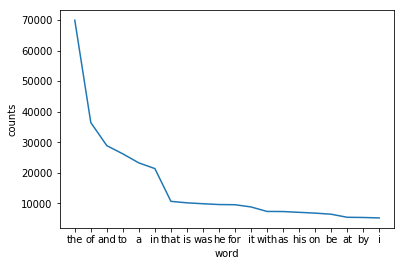

In [38]:
x, y = zip(*dict(token_counts.most_common(20)).items())

plt.plot(x, y)
plt.xlabel('word')
plt.ylabel('counts')
plt.show()

## 토픽 모델링

In [39]:
with open('korea.txt', 'r', encoding='utf-8') as f:
    tokens = []

    for sent in f.read().splitlines():
        tokens.extend(pos_tag.twitter_pos(sent, concat=True))
        
    intro_tokens = tokens
    
with open('korea2.txt', 'r', encoding='utf-8') as f:
    tokens = []

    for sent in f.read().splitlines():
        tokens.extend(pos_tag.twitter_pos(sent, concat=True))
        
    history_tokens = tokens

intro_total = len(intro_tokens)
history_total = len(history_tokens)

intro_total, history_total

[ 대한민국(大韓民國, 영어: Republic of Korea; ROK)은 동아시아의 한반도 남부에 있는 공화국이다. 서쪽으로는 서해를 사이에 두고 중화인민공화국이, 동쪽으로는 동해를 사이에 두고 일본이 있으며 북쪽으로는 조선민주주의인민공화국과 맞닿아 있다. 수도는 서울특별시이며, 국기는 태극기, 국가는 애국가(비공식), 공용어는 한국어와 한국 수어이다. ] 

형태소 분석중... : OK

[ 대한민국이라는 명칭은 3.1 운동을 통해 독립을 선언하고, 1919년 4월 11일 대한민국 임시정부가 수립하며 시작되었다. 1945년 광복 이후, 한반도의 북위 38도선 이남 지역 거주자들의 자유로운 선거(5.10 총선거)를 통하여 1948년 8월 15일에 공식적인 민주주의 국가로 출범하였다. 대한민국 헌법 전문에 따르면 대한국민은 3.1운동으로 건립된 대한민국 임시 정부의 법통을 계승한다. 대한민국은 1948년 12월 유엔 총회 결의 제195호를 통해 유엔으로부터 한반도 대다수 주민의 자유로운 의사에 따라 탄생한 한반도 유일한 정부로서 합법 정부로 승인 받았다. 이와 관련하여 대한민국 정부가 1948년에 유엔 감시 하에 선거를 실시한 한반도 이남에서만 유일한 합법 정부라는 주장도 있다. 1991년 대한민국과 조선민주주의인민공화국은 동시에 UN에 가입하였다. 한편 국제법 상의 관례와 통설, 대한민국의 헌법재판소의 판례에 따르면 조선민주주의인민공화국이 UN에 가입하였다 하여 가맹국들 상호 간에도 당연히 그 국가성이 승인되는 것은 아니고 또 그러한 의무가 있는 것이 아니다. 대한민국은 조선민주주의인민공화국의 국가성을 원칙적으로 부정한다. ] 

형태소 분석중... : OK

[ 대한민국은 한국 전쟁 이래 일명 '한강의 기적'이라고 불리는 높은 경제 발전을 이룩하며, 1990년대에 이르러 세계적인 경제 강국으로 발전하였다. 2015년 구매력 기준 1인당 국민 총소득(GDP)은 36,601달러로 세계은행에서 고소득 국가로 분류되었고, 2016년 유엔의 인간 개발 지수(HDI)

(450, 559)

In [40]:
intro_tokens

['대한민국/Noun',
 '(/Punctuation',
 '大韓民國/Foreign',
 ',/Punctuation',
 '영어/Noun',
 ':/Punctuation',
 'Republic/Alpha',
 'of/Alpha',
 'Korea/Alpha',
 ';/Punctuation',
 'ROK/Alpha',
 ')/Punctuation',
 '은/Noun',
 '동아시아/Noun',
 '의/Josa',
 '한반도/Noun',
 '남부/Noun',
 '에/Josa',
 '있는/Adjective(있다)',
 '공화국/Noun',
 '이다/Josa',
 './Punctuation',
 '서쪽/Noun',
 '으로는/Josa',
 '서해/Noun',
 '를/Josa',
 '사이/Noun',
 '에/Josa',
 '두고/Verb(두다)',
 '중화인민공화국/Noun',
 '이/Josa',
 ',/Punctuation',
 '동쪽/Noun',
 '으로는/Josa',
 '동해/Noun',
 '를/Josa',
 '사이/Noun',
 '에/Josa',
 '두고/Verb(두다)',
 '일본/Noun',
 '이/Josa',
 '있으며/Adjective(있다)',
 '북쪽/Noun',
 '으로는/Josa',
 '조선/Noun',
 '민주주의/Noun',
 '인민공화국/Noun',
 '과/Josa',
 '맞닿아/Verb(맞닿다)',
 '있다/Adjective(있다)',
 './Punctuation',
 '수도/Noun',
 '는/Josa',
 '서울특별시/Noun',
 '이며/Josa',
 ',/Punctuation',
 '국기/Noun',
 '는/Josa',
 '태극기/Noun',
 ',/Punctuation',
 '국가/Noun',
 '는/Josa',
 '애국가/Noun',
 '(/Punctuation',
 '비공식/Noun',
 '),/Punctuation',
 '공/Modifier',
 '용어/Noun',
 '는/Josa',
 '한국어/Noun',
 '와/Josa',


In [41]:
history_tokens

["'/Punctuation",
 '대한민국/Noun',
 "'/Punctuation",
 '이란/Noun',
 '국호/Noun',
 '중/Noun',
 '대한/Noun',
 '(/Punctuation',
 '大韓/Foreign',
 ')/Punctuation',
 '의/Noun',
 '어원/Noun',
 '은/Josa',
 '고대/Noun',
 '한반도/Noun',
 '남부/Noun',
 '일대/Noun',
 '에/Josa',
 '존재/Noun',
 '했던/Verb(하다)',
 '나라/Noun',
 '의/Josa',
 '이름/Noun',
 '인/Josa',
 '한/Verb(하다)',
 '(/Punctuation',
 '韓/Foreign',
 ')/Punctuation',
 '에서/Josa',
 '유래/Noun',
 '한다/Verb(하다)',
 './Punctuation',
 '마한/Noun',
 ',/Punctuation',
 '진한/Adjective(진하다)',
 ',/Punctuation',
 '변한을/Adjective(변하다)',
 '합쳐/Verb(합치다)',
 '삼한/Noun',
 '이라고/Josa',
 '불렀으며/Verb(부르다)',
 ',/Punctuation',
 '고구려/Noun',
 ',/Punctuation',
 '백제/Noun',
 ',/Punctuation',
 '신라/Noun',
 '를/Josa',
 '합쳐/Verb(합치다)',
 '삼한/Noun',
 '이라/Josa',
 '부르/Verb(부르다)',
 '기도/Noun',
 '하였다/Verb(하다)',
 './Punctuation',
 '한/Verb(하다)',
 '(/Punctuation',
 '韓/Foreign',
 ')/Punctuation',
 '이라는/Josa',
 '말/Noun',
 '은/Josa',
 '종교/Noun',
 '적/Suffix',
 '의미/Noun',
 '와/Josa',
 '정치/Noun',
 '적/Suffix',
 '의미/Noun',
 '가/Josa',
 '복합

In [42]:
intro_tf = {}
history_tf = {}

intro_counts = Counter(intro_tokens)
print('intro_counts.most_common(5):', intro_counts.most_common(5))
intro_tf['대한민국/Noun'] = intro_counts['대한민국/Noun'] / intro_total

history_counts = Counter(history_tokens)
print('history_counts.most_common(5):', history_counts.most_common(5))
history_tf['대한민국/Noun'] = history_counts['대한민국/Noun'] / history_total

print('Term Frequency of "대한민국/Noun" in intro is: {:.4f}'.format(intro_tf['대한민국/Noun']))
print('Term Frequency of "대한민국/Noun" in history is: {:.4f}'.format(history_tf['대한민국/Noun']))


intro_counts.most_common(5): [('./Punctuation', 16), ('대한민국/Noun', 14), (',/Punctuation', 11), ('의/Josa', 11), ('(/Punctuation', 10)]
history_counts.most_common(5): [("'/Punctuation", 42), ('./Punctuation', 15), ('을/Josa', 15), ('의/Josa', 13), ('이름/Noun', 12)]
Term Frequency of "대한민국/Noun" in intro is: 0.0311
Term Frequency of "대한민국/Noun" in history is: 0.0161


In [43]:
intro_tf['과/Josa'] = intro_counts['과/Josa'] / intro_total
history_tf['과/Josa'] = history_counts['과/Josa'] / history_total

print('Term Frequency of "과/Josa" in intro is: {:.4f}'.format(intro_tf['과/Josa']))
print('Term Frequency of "과/Josa" in history is: {:.4f}'.format(history_tf['과/Josa']))

Term Frequency of "과/Josa" in intro is: 0.0067
Term Frequency of "과/Josa" in history is: 0.0036


## IDF(Inverse Document Frequency)

#### 한 단어가 전체 문서 집합에서 얼마나 공통적으로 나타나는지를 나타내는 값
#### log(전체 문서의 수 / 해당 단어를 포함한 문서의 수)

#### `대한민국/Noun`의 IDF 
- 전체 문서의 수 / `대한민국/Noun`을 포함하는 문서의 수
- 2 / 2 = 1

#### `과/Josa`의 IDF 
- 전체 문서의 수 / `과/Josa`을 포함하는 문서의 수
- 2 / 2 = 1

#### 별 차이 없는데...
### 다른 단어로 확인해보자

#### `활동/Noun`이라는 단어로 확인해 보자

In [44]:
intro_tf['활동/Noun'] = intro_counts['활동/Noun'] / intro_total
history_tf['활동/Noun'] = history_counts['활동/Noun'] / history_total

print('Term Frequency of "활동/Noun" in intro is: {:.4f}'.format(intro_tf['활동/Noun']))
print('Term Frequency of "활동/Noun" in history is: {:.4f}'.format(history_tf['활동/Noun']))

Term Frequency of "활동/Noun" in intro is: 0.0022
Term Frequency of "활동/Noun" in history is: 0.0000


#### `활동/Noun`의 IDF 
- 전체 문서의 수 / `활동/Noun`을 포함하는 문서의 수
- 2 / 1 = 2

#### 전체 문서중 해당 단어의 빈도가 적을 수록 idf값이 증가(문서의 중요 단어)

In [45]:
num_docs_containing_and = 0
num_docs_containing_korea = 0
num_docs_containing_activity = 0

for doc in [intro_tokens, history_tokens]:
    print(doc)
    if '과/Josa' in doc:
        num_docs_containing_and += 1
    if '대한민국/Noun' in doc:
        num_docs_containing_korea += 1
    if '활동/Noun' in doc:
        num_docs_containing_activity += 1
        
num_docs_containing_and, num_docs_containing_korea, num_docs_containing_activity

['대한민국/Noun', '(/Punctuation', '大韓民國/Foreign', ',/Punctuation', '영어/Noun', ':/Punctuation', 'Republic/Alpha', 'of/Alpha', 'Korea/Alpha', ';/Punctuation', 'ROK/Alpha', ')/Punctuation', '은/Noun', '동아시아/Noun', '의/Josa', '한반도/Noun', '남부/Noun', '에/Josa', '있는/Adjective(있다)', '공화국/Noun', '이다/Josa', './Punctuation', '서쪽/Noun', '으로는/Josa', '서해/Noun', '를/Josa', '사이/Noun', '에/Josa', '두고/Verb(두다)', '중화인민공화국/Noun', '이/Josa', ',/Punctuation', '동쪽/Noun', '으로는/Josa', '동해/Noun', '를/Josa', '사이/Noun', '에/Josa', '두고/Verb(두다)', '일본/Noun', '이/Josa', '있으며/Adjective(있다)', '북쪽/Noun', '으로는/Josa', '조선/Noun', '민주주의/Noun', '인민공화국/Noun', '과/Josa', '맞닿아/Verb(맞닿다)', '있다/Adjective(있다)', './Punctuation', '수도/Noun', '는/Josa', '서울특별시/Noun', '이며/Josa', ',/Punctuation', '국기/Noun', '는/Josa', '태극기/Noun', ',/Punctuation', '국가/Noun', '는/Josa', '애국가/Noun', '(/Punctuation', '비공식/Noun', '),/Punctuation', '공/Modifier', '용어/Noun', '는/Josa', '한국어/Noun', '와/Josa', '한국/Noun', '수어/Noun', '이다/Josa', './Punctuation', '대한민국/Noun', '이라는/Jo

(2, 2, 1)

In [46]:
num_docs = 2

intro_idf = {}
history_idf = {}

intro_idf['과/Josa'] = num_docs / num_docs_containing_and
history_idf['과/Josa'] = num_docs / num_docs_containing_and
print("intro_idf['과/Josa']:", intro_idf['과/Josa'])
print("history_idf['과/Josa']:", history_idf['과/Josa'])

intro_idf['대한민국/Noun'] = num_docs / num_docs_containing_korea
history_idf['대한민국/Noun'] = num_docs / num_docs_containing_korea
print("intro_idf['대한민국/Noun']:", intro_idf['대한민국/Noun'])
print("history_idf['대한민국/Noun']:", history_idf['대한민국/Noun'])

intro_idf['활동/Noun'] = num_docs / num_docs_containing_activity
history_idf['활동/Noun'] = num_docs / num_docs_containing_activity
print("intro_idf['활동/Noun']:", intro_idf['활동/Noun'])
print("history_idf['활동/Noun']:", history_idf['활동/Noun'])

intro_idf['과/Josa']: 1.0
history_idf['과/Josa']: 1.0
intro_idf['대한민국/Noun']: 1.0
history_idf['대한민국/Noun']: 1.0
intro_idf['활동/Noun']: 2.0
history_idf['활동/Noun']: 2.0


## TF-IDF

#### TF-IDF값이 클수록 해당 문서에서 중요한 단어라고 생각할 수 있음

In [47]:
intro_tfidf = {}

intro_tfidf['과/Josa'] = intro_tf['과/Josa'] * intro_idf['과/Josa']
intro_tfidf['대한민국/Noun'] = intro_tf['대한민국/Noun'] * intro_idf['대한민국/Noun']
intro_tfidf['활동/Noun'] = intro_tf['활동/Noun'] * intro_idf['활동/Noun']

intro_tfidf

{'과/Josa': 0.006666666666666667,
 '대한민국/Noun': 0.03111111111111111,
 '활동/Noun': 0.0044444444444444444}

In [48]:
history_tfidf = {}

history_tfidf['과/Josa'] = history_tf['과/Josa'] * history_idf['과/Josa']
history_tfidf['대한민국/Noun'] = history_tf['대한민국/Noun'] * history_idf['대한민국/Noun']
history_tfidf['활동/Noun'] = history_tf['활동/Noun'] * history_idf['활동/Noun']

history_tfidf

{'과/Josa': 0.0035778175313059034,
 '대한민국/Noun': 0.016100178890876567,
 '활동/Noun': 0.0}